After downloading the data for different swim seasons, I want to explore what I can learn from the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#open files
df_rc_17 = pd.read_csv('races_2016_2017.csv')
df_rc_18 = pd.read_csv('races_2017_2018.csv')
df_rc_19 = pd.read_csv('races_2018_2019.csv')
df_rc_20 = pd.read_csv('races_2019_2020.csv')
#df_meets = pd.read_csv('meets_2016_2017.csv')
#df_clubs = pd.read_csv('clubs_2016_2017.csv')

# Gender breakdown

Not considering relay results that were not included in the individual times:
compare the total number of races year to year
compare the number of women/men year to year
compare the number of women vs men races in each season

In [7]:
#create a df of swim results that only includes the gender column from each season
df_rc = pd.concat([df_rc_17['sw_gender'].value_counts(), df_rc_18['sw_gender'].value_counts(),
          df_rc_19['sw_gender'].value_counts(), df_rc_20['sw_gender'].value_counts()], axis=1)
df_rc.columns = ['2016-17', '2017-18', '2018-19', '2019-20']
df_rc

,2016-17,2017-18,2018-19,2019-20
Men,8251,7508,9956,4899
Women,7915,6942,9100,4403
Relays,970,734,1044,424
Resources,96,24,21,50


In [9]:
#drop the Resources
df_rc.drop(["Resources"], axis=0, inplace=True)
df_rc

,2016-17,2017-18,2018-19,2019-20
Men,8251,7508,9956,4899
Women,7915,6942,9100,4403
Relays,970,734,1044,424


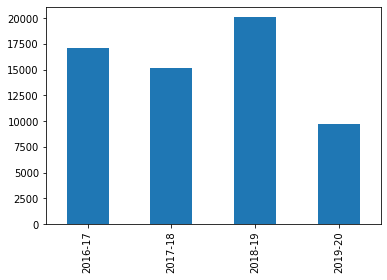

In [15]:
df_rc.sum().plot.bar()

In [18]:
df_rc.loc['Men']

2016-17    8251
2017-18    7508
2018-19    9956
2019-20    4899
Name: Men, dtype: int64

In [21]:
df_rc.columns

Index(['2016-17', '2017-18', '2018-19', '2019-20'], dtype='object')

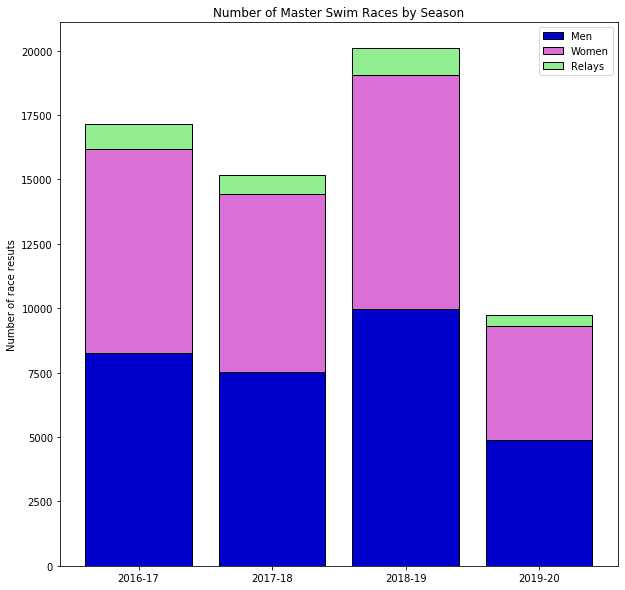

In [46]:
fig, ax= plt.subplots(figsize=[10,10])

m_cnt = df_rc.loc['Men']
w_cnt = df_rc.loc['Women']
r_cnt = df_rc.loc['Relays']
labels = df_rc.columns

ax.bar(labels, m_cnt, label = 'Men', color = "mediumblue", edgecolor = "black")
ax.bar(labels, w_cnt, label = 'Women', bottom=m_cnt, color = "orchid", edgecolor = "black")
ax.bar(labels, r_cnt, label = 'Relays', bottom=(w_cnt+m_cnt), color = "lightgreen", edgecolor = "black")

plt.ylabel('Number of race resuts')
plt.title("Number of Master Swim Races by Season")
plt.legend()

fig.savefig("2016_2020_RaceTotals.png")

In [50]:
df_rc

,2016-17,2017-18,2018-19,2019-20
Men,8251,7508,9956,4899
Women,7915,6942,9100,4403
Relays,970,734,1044,424


In [53]:
df_rc.sum()

2016-17    17136
2017-18    15184
2018-19    20100
2019-20     9726
dtype: int64

In [56]:
df_rc['sw_gender'].value_counts()

Men          4899
Women        4403
Relays        424
Resources      50
Name: sw_gender, dtype: int64

In [57]:
genders = ["Wommen", "Men"]
df_gen = df_rc[(df_rc.sw_gender == "Women") | (df_rc.sw_gender == "Men")]
df_gen['sw_gender'].value_counts()

Men      4899
Women    4403
Name: sw_gender, dtype: int64

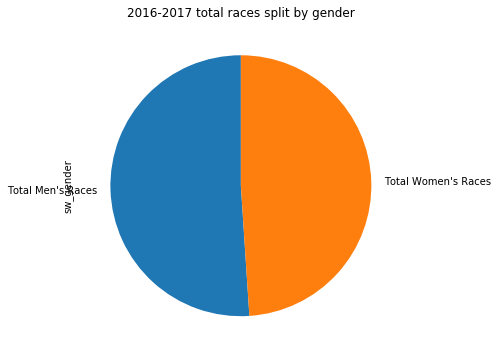

In [21]:
df_gen['sw_gender'].value_counts().plot.pie(figsize=(6,6), labels=["Total Men's Races", "Total Women's Races"],
                                           title="2016-2017 total races split by gender", startangle=90)

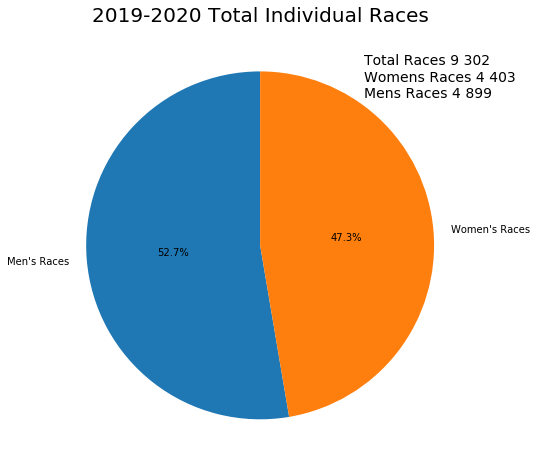

In [58]:
#reference: https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
#reference: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pie, ax = plt.subplots(figsize=[8,8])
labels = ["Men's Races", "Women's Races"]
data = df_gen['sw_gender'].value_counts()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5, startangle = 90)
plt.title(label="2019-2020 Total Individual Races", fontsize=20)

textstr = '\n'.join((
    r'Total Races 9 302',
    r'Womens Races 4 403',
    r'Mens Races 4 899'))

ax.text(0.60, 0.85, textstr, fontsize=14)
pie.savefig("2019_2020_RaceByGender.png")

In [8]:
len(df_rc_17['meet_id_2'].unique())

30

In [9]:
len(df_rc_17['sw_id'].unique())

1724

In [13]:
df_rc_17['sw_yob'].describe()

count    16166.000000
mean      1971.364840
std         14.819128
min       1924.000000
25%       1961.000000
50%       1972.000000
75%       1983.000000
max       1999.000000
Name: sw_yob, dtype: float64

In [14]:
df_rc_17['sw_gender'].value_counts()

Men          8251
Women        7915
Relays        970
Resources      96
Name: sw_gender, dtype: int64

In [16]:
df_rc_17[df_rc_17.sw_gender == "Resources"]["meet_id_2"].value_counts()

602278    73
601606    23
Name: meet_id_2, dtype: int64

In [17]:
df_rc_17[df_rc_17.sw_gender == "Resources"].head()

,meet_id_2,rc_course,rc_dist_stroke,rc_round,rc_time,sw_gender,sw_id,sw_yob
10512,601606,NaN,NaN,Meet package,"<span class=""truncate""><a href=""https://regist...",Resources,NaN,NaN
10693,601606,NaN,NaN,Meet package,"<span class=""truncate""><a href=""https://regist...",Resources,NaN,NaN
10923,601606,NaN,NaN,Meet package,"<span class=""truncate""><a href=""https://regist...",Resources,NaN,NaN
11045,601606,NaN,NaN,Meet package,"<span class=""truncate""><a href=""https://regist...",Resources,NaN,NaN
11074,601606,NaN,NaN,Meet package,"<span class=""truncate""><a href=""https://regist...",Resources,NaN,NaN


In [6]:
temp_df_rc_17 = df_rc_17[df_rc_17.sw_gender != "Resources"]

In [7]:
temp_df_rc_17['sw_gender'].value_counts()

Men       8251
Women     7915
Relays     970
Name: sw_gender, dtype: int64

In [10]:
temp_df_rc_17[temp_df_rc_17.sw_gender != 'Relays']['rc_dist_stroke'].value_counts()

50m Freestyle             2029
100m Freestyle            1553
50m Butterfly             1154
200m Freestyle            1138
50m Breaststroke          1071
100m Medley               1067
400m Freestyle            1034
50m Backstroke             972
100m Breaststroke          784
50m Freestyle Laps         731
100m Backstroke            684
200m Medley                601
800m Freestyle             532
100m Butterfly             469
200m Breaststroke          399
200m Backstroke            391
1500m Freestyle            242
400m Medley                241
200m Butterfly             211
25m Freestyle              211
50m Breaststroke Laps      150
50m Butterfly Laps         147
100m Freestyle Laps        140
25m Butterfly               55
100m Breaststroke Laps      39
100m Butterfly Laps         38
25m Breaststroke            36
25m Backstroke              32
Name: rc_dist_stroke, dtype: int64

In [15]:
x = temp_df_rc_17[temp_df_rc_17.sw_gender != 'Relays']['rc_dist_stroke'].value_counts()

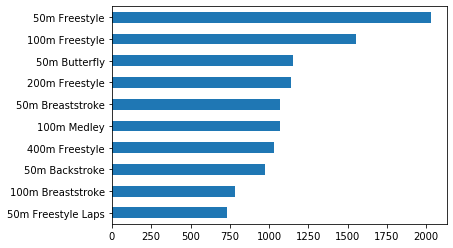

In [21]:
x.head(10).plot(kind='barh').invert_yaxis()